In [1]:
import os
import requests

def download_dataset(url, file_name):
  """Downloads a dataset from GitHub.

  Args:
    url: The URL of the dataset on GitHub.
    file_name: The name of the file to save the dataset to.

  Returns:
    # The path to the downloaded file.
  """

  response = requests.get(url, stream=True)
  file_path = os.path.join(os.getcwd(), file_name)
  with open(file_path, 'wb') as f:
    for chunk in response.iter_content(chunk_size=1024):
      f.write(chunk)

  return file_path

DATASET_PATH = "https://raw.githubusercontent.com/amankharwal/Website-data/master/twitter.csv"
download_dataset(DATASET_PATH, "twitter.csv")

'/home/helina/Downloads/twitter.csv'

In [9]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 109.8 kB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 76.9 kB/s eta 0:00:0000:0100:12


In [55]:
from nltk.util import pr
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import re
import nltk
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from gtts import gTTS
from IPython.display import Audio, display

In [11]:


stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
data = pd.read_csv("twitter.csv")
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [12]:
#Labeling
data["labels"] = data["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})

In [13]:
data = data[["tweet", "labels"]]
data


,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/helina/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
porter_stemmer = PorterStemmer()
words = "english"
stemmed_words = [porter_stemmer.stem(word) for word in words]
stopword = set(stopwords.words(words))

In [16]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [18]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)






 **DecisionTree**

In [19]:

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
sample = "i hate you "
data = cv.transform([sample]).toarray()
pre = DecisionTree.predict(data)
print(pre)

['No Hate and Offensive']


In [21]:
dt_predictions = DecisionTree.predict(X_test)

In [23]:
print("\nDecisionTree:")
print("Accuracy:", accuracy_score(y_test,dt_predictions))
print("Classification Report:\n", classification_report(y_test,dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test,dt_predictions))
conf_matrix = confusion_matrix(y_test,dt_predictions)


DecisionTree:
Accuracy: 0.87467905611933
Classification Report:
                        precision    recall  f1-score   support

          Hate Speech       0.37      0.34      0.35       465
No Hate and Offensive       0.81      0.81      0.81      1379
   Offensive Language       0.92      0.93      0.93      6335

             accuracy                           0.87      8179
            macro avg       0.70      0.69      0.70      8179
         weighted avg       0.87      0.87      0.87      8179

Confusion Matrix:
 [[ 156   38  271]
 [  33 1113  233]
 [ 229  221 5885]]


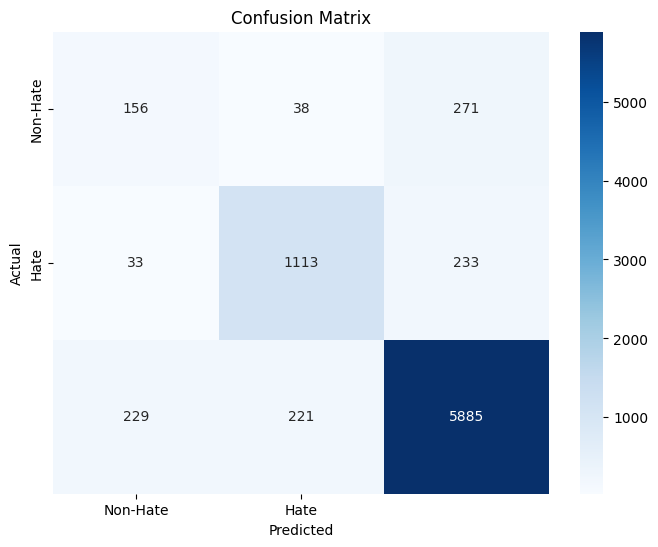

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**SVM**

In [25]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)
svm_predictions = svm_classifier.predict(X_test)

In [26]:
sample = "i will hate you "
data = cv.transform([sample]).toarray()
pre = svm_classifier.predict(data)
print(pre)

['Offensive Language']


In [27]:
svm_predictions = svm_classifier.predict(X_test)

In [28]:
print("\nSVM:")
print("Accuracy:", accuracy_score(y_test,svm_predictions))
print("Classification Report:\n", classification_report(y_test,svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test,svm_predictions))
svm_conf_matrix = confusion_matrix(y_test,svm_predictions)


SVM:
Accuracy: 0.8883726616945837
Classification Report:
                        precision    recall  f1-score   support

          Hate Speech       0.42      0.31      0.35       465
No Hate and Offensive       0.83      0.83      0.83      1379
   Offensive Language       0.93      0.94      0.93      6335

             accuracy                           0.89      8179
            macro avg       0.73      0.69      0.71      8179
         weighted avg       0.88      0.89      0.88      8179

Confusion Matrix:
 [[ 143   36  286]
 [  36 1145  198]
 [ 163  194 5978]]


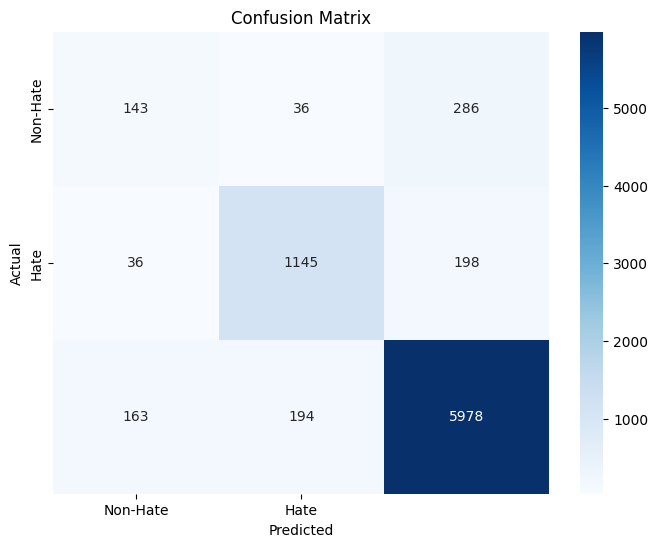

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest**

In [30]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train,y_train)
rf_predictions = rf_classifier.predict(X_test)

In [38]:
sample = "i will hate you "
data = cv.transform([sample]).toarray()
preRF = rf_classifier.predict(data)
print(pre[0])

Offensive Language


In [32]:
rf_predictions = rf_classifier.predict(X_test)

In [33]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test,rf_predictions))
print("Classification Report:\n", classification_report(y_test,rf_predictions))
rf_conf_matrix = confusion_matrix(y_test,rf_predictions)


Random Forest:
Accuracy: 0.8908179484044504
Classification Report:
                        precision    recall  f1-score   support

          Hate Speech       0.48      0.25      0.33       465
No Hate and Offensive       0.83      0.82      0.83      1379
   Offensive Language       0.92      0.95      0.94      6335

             accuracy                           0.89      8179
            macro avg       0.74      0.67      0.70      8179
         weighted avg       0.88      0.89      0.88      8179



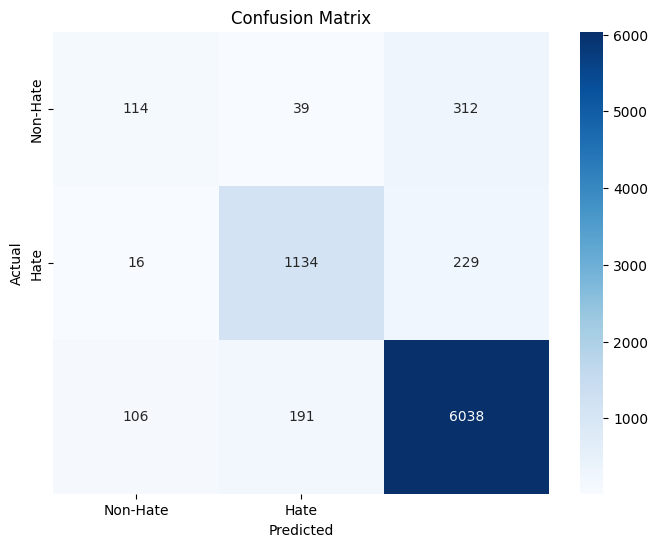

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [69]:
# prompt: hear voice to text

import speech_recognition as sr

# Create a Speech Recognition object
r = sr.Recognizer()

# Use the microphone as the audio source
mic = sr.Microphone()

# Start listening
with mic as source:
    print("Speak now")
    audio = r.listen(source)

# Try to recognize the speech
try:
    text = r.recognize_google(audio)
    print("You said: {}".format(text))
except sr.UnknownValueError:
    print("Could not understand audio") 
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))

text = cv.transform([text]).toarray()
text = rf_classifier.predict(text)
print(text)
text_to_speak = text[0]

# Create a gTTS object
tts = gTTS(text=text_to_speak, lang='en', slow=False)

# Save the audio to a file (optional)
tts.save("output_audio.mp3")

# Play the audio in the Colab notebook
display(Audio("output_audio.mp3", autoplay=True))




ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unk

Speak now
You said: I'm going to kill you
['No Hate and Offensive']
